<a href="https://www.kaggle.com/code/dasaris/cyclistic-exploratory-data-analysis-python?scriptVersionId=98219509" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Exploratory Analysis - Cyclistic Bike Share

This is my take on recreating my exploratory analysis of the cyclistic bike share date based on R. 
I do this to train my Python skills.

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import os

In [2]:
#Joining the files in one dataframe. Data from 2020/04 to 2021/04

files = os.path.join("../input/cyclistic-bike-share", "*divvy-tripdata.csv")
files = glob.glob(files)
df = pd.concat(map(pd.read_csv, files), ignore_index=True)

## Getting familiar with the data

In [3]:
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,BD0A6FF6FFF9B921,electric_bike,2020-11-01 13:36:00,2020-11-01 13:45:40,Dearborn St & Erie St,110.0,St. Clair St & Erie St,211.0,41.894177,-87.629127,41.894434,-87.623379,casual
1,96A7A7A4BDE4F82D,electric_bike,2020-11-01 10:03:26,2020-11-01 10:14:45,Franklin St & Illinois St,672.0,Noble St & Milwaukee Ave,29.0,41.890959,-87.635343,41.900675,-87.662480,casual
2,C61526D06582BDC5,electric_bike,2020-11-01 00:34:05,2020-11-01 01:03:06,Lake Shore Dr & Monroe St,76.0,Federal St & Polk St,41.0,41.880983,-87.616754,41.872054,-87.629550,casual
3,E533E89C32080B9E,electric_bike,2020-11-01 00:45:16,2020-11-01 00:54:31,Leavitt St & Chicago Ave,659.0,Stave St & Armitage Ave,185.0,41.895499,-87.682013,41.917744,-87.691392,casual
4,1C9F4EF18C168C60,electric_bike,2020-11-01 15:43:25,2020-11-01 16:16:52,Buckingham Fountain,2.0,Buckingham Fountain,2.0,41.876497,-87.620358,41.876448,-87.620338,casual


In [4]:
#column names
for col in df.columns:
    print(col)

ride_id
rideable_type
started_at
ended_at
start_station_name
start_station_id
end_station_name
end_station_id
start_lat
start_lng
end_lat
end_lng
member_casual


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3826978 entries, 0 to 3826977
Data columns (total 13 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ride_id             object 
 1   rideable_type       object 
 2   started_at          object 
 3   ended_at            object 
 4   start_station_name  object 
 5   start_station_id    object 
 6   end_station_name    object 
 7   end_station_id      object 
 8   start_lat           float64
 9   start_lng           float64
 10  end_lat             float64
 11  end_lng             float64
 12  member_casual       object 
dtypes: float64(4), object(9)
memory usage: 379.6+ MB


Columns: 13, Rows: 3826978 with different types of data 

## Start manipulating the data

In [6]:
#renaming some columns for better context and easier work 
df = df.rename(columns = {
                        "rideable_type": "bike_type", 
                        "start_station_name": "start_station",
                        "end_station_name": "end_station",
                        "member_casual": "user_type"        
})

df.head()

,ride_id,bike_type,started_at,ended_at,start_station,start_station_id,end_station,end_station_id,start_lat,start_lng,end_lat,end_lng,user_type
0,BD0A6FF6FFF9B921,electric_bike,2020-11-01 13:36:00,2020-11-01 13:45:40,Dearborn St & Erie St,110.0,St. Clair St & Erie St,211.0,41.894177,-87.629127,41.894434,-87.623379,casual
1,96A7A7A4BDE4F82D,electric_bike,2020-11-01 10:03:26,2020-11-01 10:14:45,Franklin St & Illinois St,672.0,Noble St & Milwaukee Ave,29.0,41.890959,-87.635343,41.900675,-87.662480,casual
2,C61526D06582BDC5,electric_bike,2020-11-01 00:34:05,2020-11-01 01:03:06,Lake Shore Dr & Monroe St,76.0,Federal St & Polk St,41.0,41.880983,-87.616754,41.872054,-87.629550,casual
3,E533E89C32080B9E,electric_bike,2020-11-01 00:45:16,2020-11-01 00:54:31,Leavitt St & Chicago Ave,659.0,Stave St & Armitage Ave,185.0,41.895499,-87.682013,41.917744,-87.691392,casual
4,1C9F4EF18C168C60,electric_bike,2020-11-01 15:43:25,2020-11-01 16:16:52,Buckingham Fountain,2.0,Buckingham Fountain,2.0,41.876497,-87.620358,41.876448,-87.620338,casual


In [7]:
#Parsing the Datetime columns to get the right dtype
df['started_at'] = pd.to_datetime(df['started_at'], format = "%Y-%m-%d %H:%M:%S")
df['ended_at'] = pd.to_datetime(df['ended_at'], format = "%Y-%m-%d %H:%M:%S")

#Checking if it worked
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3826978 entries, 0 to 3826977
Data columns (total 13 columns):
 #   Column            Dtype         
---  ------            -----         
 0   ride_id           object        
 1   bike_type         object        
 2   started_at        datetime64[ns]
 3   ended_at          datetime64[ns]
 4   start_station     object        
 5   start_station_id  object        
 6   end_station       object        
 7   end_station_id    object        
 8   start_lat         float64       
 9   start_lng         float64       
 10  end_lat           float64       
 11  end_lng           float64       
 12  user_type         object        
dtypes: datetime64[ns](2), float64(4), object(7)
memory usage: 379.6+ MB


In [8]:
#Removing Duplicate Ride IDs since we only want distinct rides
df = df.drop_duplicates(subset=['ride_id'])

df.info()
print('Rows removed: ' + str(3826978 - 3826769))


<class 'pandas.core.frame.DataFrame'>
Int64Index: 3826769 entries, 0 to 3826977
Data columns (total 13 columns):
 #   Column            Dtype         
---  ------            -----         
 0   ride_id           object        
 1   bike_type         object        
 2   started_at        datetime64[ns]
 3   ended_at          datetime64[ns]
 4   start_station     object        
 5   start_station_id  object        
 6   end_station       object        
 7   end_station_id    object        
 8   start_lat         float64       
 9   start_lng         float64       
 10  end_lat           float64       
 11  end_lng           float64       
 12  user_type         object        
dtypes: datetime64[ns](2), float64(4), object(7)
memory usage: 408.7+ MB
Rows removed: 209


In [9]:
#check for null values
df.isnull().values.any()

True

In [10]:
#So we got Null Values. How many?

df.isnull().sum()

ride_id                  0
bike_type                0
started_at               0
ended_at                 0
start_station       148231
start_station_id    148857
end_station         171415
end_station_id      171876
start_lat                0
start_lng                0
end_lat               5004
end_lng               5004
user_type                0
dtype: int64

In [11]:
#deleting all null values. Since we got a over 3 million entries, we can remove 171876 rows without seriously impacting the results of the analysis. 
df = df.dropna()
df.isnull().sum()

ride_id             0
bike_type           0
started_at          0
ended_at            0
start_station       0
start_station_id    0
end_station         0
end_station_id      0
start_lat           0
start_lng           0
end_lat             0
end_lng             0
user_type           0
dtype: int64

In [12]:
#Adding new columns by extracting the components of the date datetime columns
df['year'] = df['started_at'].dt.year
df['month'] = df['started_at'].dt.month
df['day'] = df['ended_at'].dt.day
df['hour'] = df['ended_at'].dt.hour
df['month_year'] = df['year'].map(str) + ' - ' + df['month'].map(str)
df.head()

,ride_id,bike_type,started_at,ended_at,start_station,start_station_id,end_station,end_station_id,start_lat,start_lng,end_lat,end_lng,user_type,year,month,day,hour,month_year
0,BD0A6FF6FFF9B921,electric_bike,2020-11-01 13:36:00,2020-11-01 13:45:40,Dearborn St & Erie St,110.0,St. Clair St & Erie St,211.0,41.894177,-87.629127,41.894434,-87.623379,casual,2020,11,1,13,2020 - 11
1,96A7A7A4BDE4F82D,electric_bike,2020-11-01 10:03:26,2020-11-01 10:14:45,Franklin St & Illinois St,672.0,Noble St & Milwaukee Ave,29.0,41.890959,-87.635343,41.900675,-87.662480,casual,2020,11,1,10,2020 - 11
2,C61526D06582BDC5,electric_bike,2020-11-01 00:34:05,2020-11-01 01:03:06,Lake Shore Dr & Monroe St,76.0,Federal St & Polk St,41.0,41.880983,-87.616754,41.872054,-87.629550,casual,2020,11,1,1,2020 - 11
3,E533E89C32080B9E,electric_bike,2020-11-01 00:45:16,2020-11-01 00:54:31,Leavitt St & Chicago Ave,659.0,Stave St & Armitage Ave,185.0,41.895499,-87.682013,41.917744,-87.691392,casual,2020,11,1,0,2020 - 11
4,1C9F4EF18C168C60,electric_bike,2020-11-01 15:43:25,2020-11-01 16:16:52,Buckingham Fountain,2.0,Buckingham Fountain,2.0,41.876497,-87.620358,41.876448,-87.620338,casual,2020,11,1,16,2020 - 11


In [13]:
#Lastly, we remove whitespaces on the start and end stations
df['start_station'] = df['start_station'].str.strip()
df['end_station'] = df['end_station'].str.strip()

In [14]:
df.sort_values(by=['year', 'month'])

,ride_id,bike_type,started_at,ended_at,start_station,start_station_id,end_station,end_station_id,start_lat,start_lng,end_lat,end_lng,user_type,year,month,day,hour,month_year
391289,A847FADBBC638E45,docked_bike,2020-04-26 17:45:14,2020-04-26 18:12:03,Eckhart Park,86,Lincoln Ave & Diversey Pkwy,152.0,41.896400,-87.661000,41.932200,-87.658600,member,2020,4,26,18,2020 - 4
391290,5405B80E996FF60D,docked_bike,2020-04-17 17:08:54,2020-04-17 17:17:03,Drake Ave & Fullerton Ave,503,Kosciuszko Park,499.0,41.924400,-87.715400,41.930600,-87.723800,member,2020,4,17,17,2020 - 4
391291,5DD24A79A4E006F4,docked_bike,2020-04-01 17:54:13,2020-04-01 18:08:36,McClurg Ct & Erie St,142,Indiana Ave & Roosevelt Rd,255.0,41.894500,-87.617900,41.867900,-87.623000,member,2020,4,1,18,2020 - 4
391292,2A59BBDF5CDBA725,docked_bike,2020-04-07 12:50:19,2020-04-07 13:02:31,California Ave & Division St,216,Wood St & Augusta Blvd,657.0,41.903000,-87.697500,41.899200,-87.672200,member,2020,4,7,13,2020 - 4
391293,27AD306C119C6158,docked_bike,2020-04-18 10:22:59,2020-04-18 11:15:54,Rush St & Hubbard St,125,Sheridan Rd & Lawrence Ave,323.0,41.890200,-87.626200,41.969500,-87.654700,casual,2020,4,18,11,2020 - 4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3577077,461A6B0728E063DB,classic_bike,2021-04-09 17:09:03,2021-04-09 17:16:16,Mies van der Rohe Way & Chestnut St,15529,Franklin St & Chicago Ave,13017,41.898587,-87.621915,41.896747,-87.635668,member,2021,4,9,17,2021 - 4
3577078,CF1D3A35E3654F6F,docked_bike,2021-04-04 13:27:08,2021-04-04 14:41:11,Mies van der Rohe Way & Chestnut St,15529,Streeter Dr & Grand Ave,13022,41.898587,-87.621915,41.892278,-87.612043,casual,2021,4,4,14,2021 - 4
3577079,4308ADB9171ACE49,classic_bike,2021-04-30 18:15:40,2021-04-30 19:12:44,Mies van der Rohe Way & Chestnut St,15529,Streeter Dr & Grand Ave,13022,41.898587,-87.621915,41.892278,-87.612043,member,2021,4,30,19,2021 - 4
3577080,04DFB53077A17DA2,electric_bike,2021-04-18 11:40:37,2021-04-18 11:46:03,Mies van der Rohe Way & Chestnut St,15529,Franklin St & Chicago Ave,13017,41.898263,-87.622416,41.894942,-87.630438,member,2021,4,18,11,2021 - 4


## Analyze the Data

In [15]:
df['user_type'].value_counts()

member    2121056
casual    1471634
Name: user_type, dtype: int64

In [16]:
df.groupby('user_type').agg(
     Absolute = ("ride_id", lambda y: y.value_counts().sum()), 
     Percent = ("ride_id", lambda x: len(x) / len(df.index))
)

,Absolute,Percent
user_type,,
casual,1471634,0.409619
member,2121056,0.590381


<AxesSubplot:xlabel='user_type', ylabel='count'>

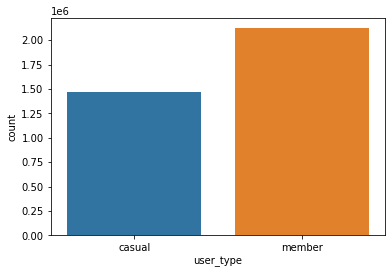

In [17]:
#plotting the distribution

sns.countplot(x = "user_type", data = df)

In [18]:
df.groupby(['year', 'month', 'user_type']).agg(
    Absolute = ("user_type", lambda y: y.value_counts().sum()) 
)

Absolute
year month user_type          
2020 4     casual        23588
           member        61089
     5     casual        86763
           member       113190
     6     casual       154509
           member       188028
     7     casual       268733
           member       281692
     8     casual       283006
           member       325504
     9     casual       215300
           member       285090
     10    casual       122810
           member       216493
     11    casual        73033
           member       149756
     12    casual        24527
           member        89176
2021 1     casual        14690
           member        68819
     2     casual         8613
           member        34383
     3     casual        75642
           member       130049
     4     casual       120420
           member       177787

<AxesSubplot:xlabel='month_year', ylabel='count'>

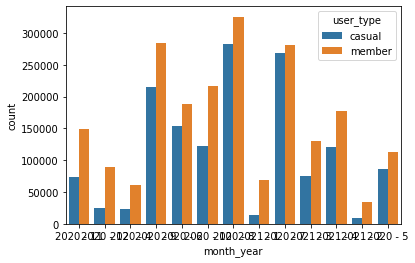

In [19]:
sns.countplot(x = "month_year", hue = "user_type", data = df)